/var/folders/qq/_d050pnj19q3_1kj0mhqpndh0000gn/T/ipykernel_30919/1051813759.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_dist.index, y=country_dist.values, palette='viridis')


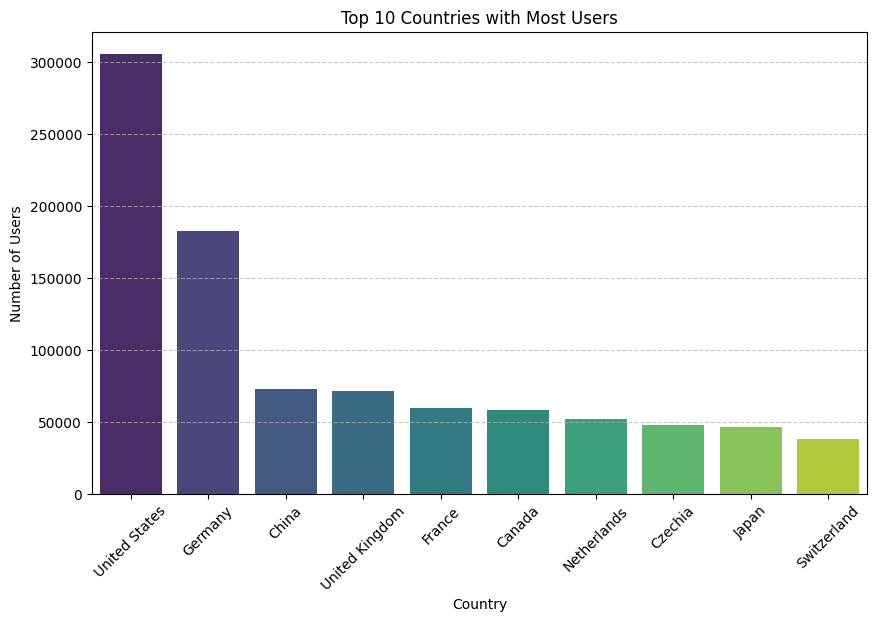

/var/folders/qq/_d050pnj19q3_1kj0mhqpndh0000gn/T/ipykernel_30919/1051813759.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_dist.index, y=city_dist.values, palette='viridis')


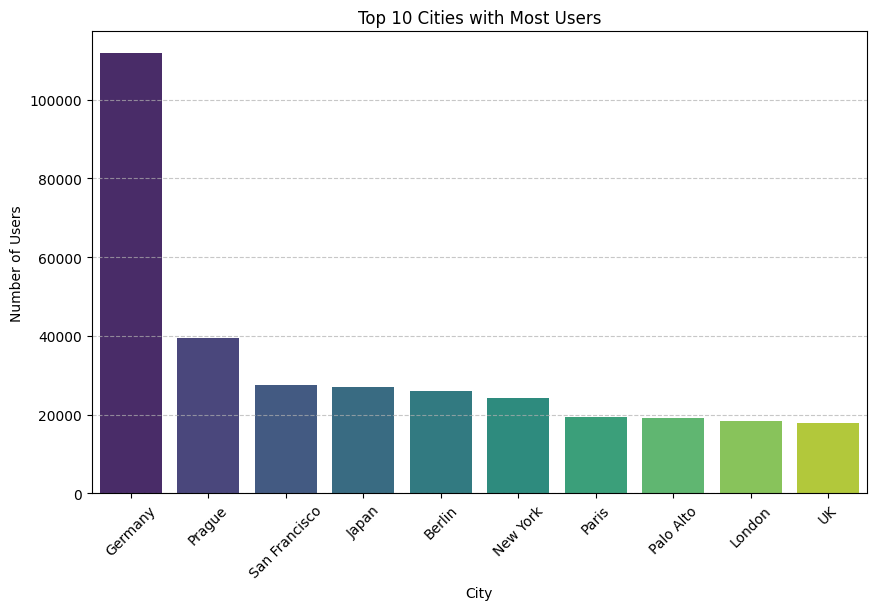

/var/folders/qq/_d050pnj19q3_1kj0mhqpndh0000gn/T/ipykernel_30919/1051813759.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=timezone_dist.index, y=timezone_dist.values, palette='viridis')


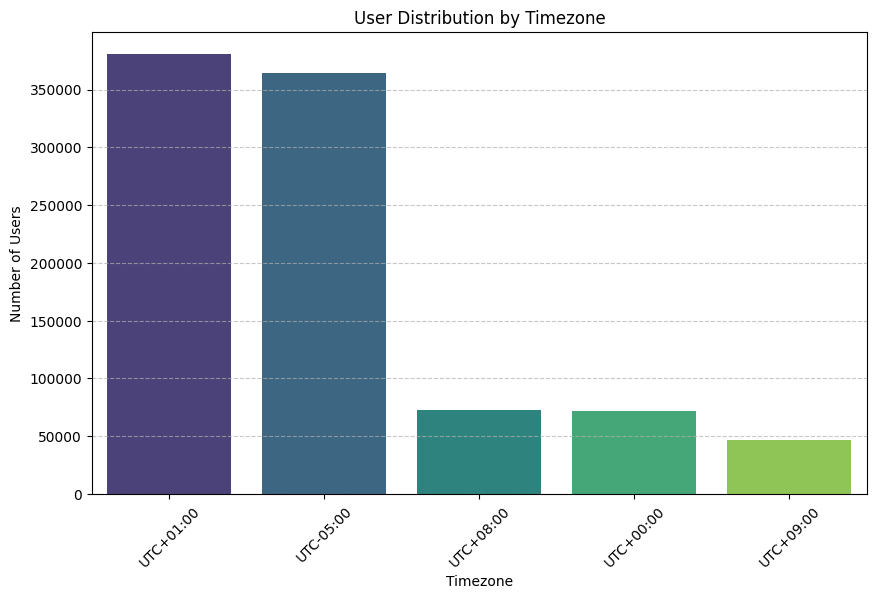

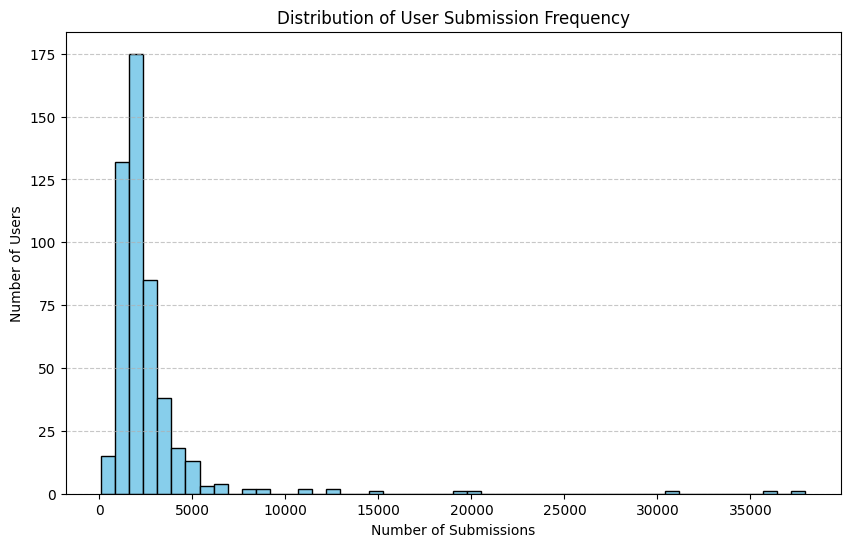

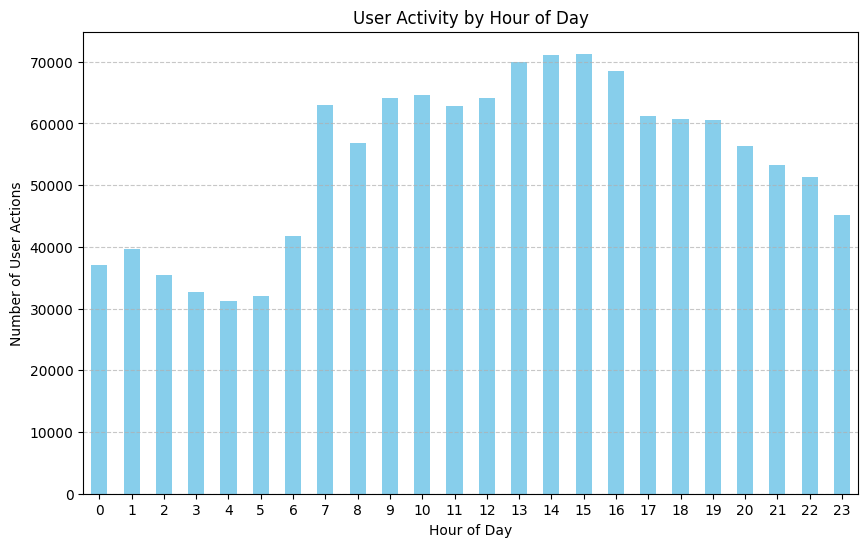

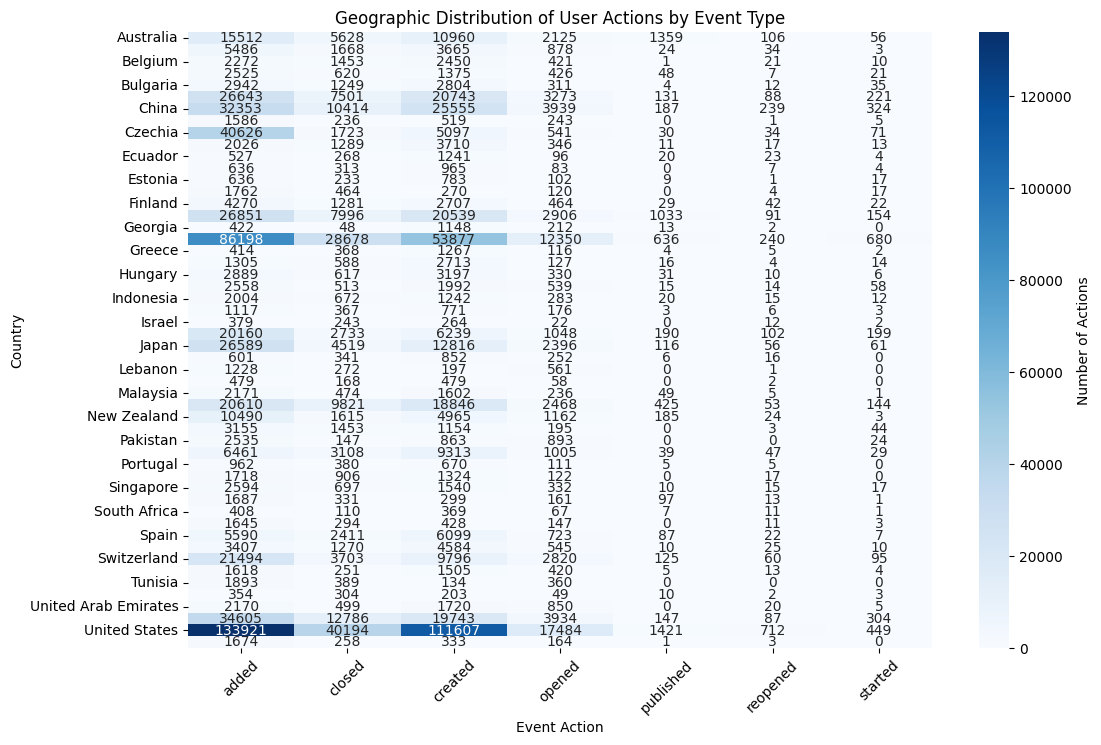

国家分布：
country
United States     305788
Germany           182659
China              73011
United Kingdom     71606
France             59570
Canada             58600
Netherlands        52367
Czechia            48122
Japan              46553
Switzerland        38093
Name: count, dtype: int64

城市分布：
city
Germany          111786
Prague            39461
San Francisco     27542
Japan             26986
Berlin            25978
New York          24334
Paris             19516
Palo Alto         19215
London            18400
UK                17789
Name: count, dtype: int64

时区分布：
timezone
UTC+01:00    380811
UTC-05:00    364388
UTC+08:00     73011
UTC+00:00     71606
UTC+09:00     46553
Name: count, dtype: int64

提交频率分布：
count      497.000000
mean      2605.183099
std       3182.585434
min         75.000000
25%       1463.000000
50%       2026.000000
75%       2716.000000
max      37960.000000
dtype: float64

事件行为分布：
event_action
added        617218
created      411961
closed       173489
opened  

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
data = pd.read_csv('users_combined_info_500.csv')

# 1. 国家和地区分布
country_dist = data['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_dist.index, y=country_dist.values, palette='viridis')
plt.title('Top 10 Countries with Most Users')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. 城市级别分布
data['city'] = data['location'].apply(lambda x: x.split(',')[0])

city_dist = data['city'].value_counts().head(10)

# 绘制城市分布的条形图
plt.figure(figsize=(10, 6))
sns.barplot(x=city_dist.index, y=city_dist.values, palette='viridis')
plt.title('Top 10 Cities with Most Users')
plt.xlabel('City')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. 时区分布（根据国家推断时区）
data['event_time'] = pd.to_datetime(data['event_time'], errors='coerce')

data['hour'] = data['event_time'].dt.hour
country_timezone_mapping = {
    'United States': 'UTC-05:00',  
    'Germany': 'UTC+01:00',
    'China': 'UTC+08:00',
    'United Kingdom': 'UTC+00:00',
    'France': 'UTC+01:00',
    'Canada': 'UTC-05:00',
    'Netherlands': 'UTC+01:00',
    'Czechia': 'UTC+01:00',
    'Japan': 'UTC+09:00',
    'Switzerland': 'UTC+01:00',
}

data['timezone'] = data['country'].map(country_timezone_mapping)

timezone_dist = data['timezone'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=timezone_dist.index, y=timezone_dist.values, palette='viridis')
plt.title('User Distribution by Timezone')
plt.xlabel('Timezone')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. 提交频率分析
user_activity = data.groupby('user_id').size()

plt.figure(figsize=(10, 6))
user_activity.plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of User Submission Frequency')
plt.xlabel('Number of Submissions')
plt.ylabel('Number of Users')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 5. 用户活跃时间段分析
data['hour'] = data['event_time'].dt.hour

hourly_activity = data['hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
hourly_activity.plot(kind='bar', color='skyblue')
plt.title('User Activity by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of User Actions')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 6. 地理位置与行为模式分析
geo_behavior = data.groupby(['country', 'event_action']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(geo_behavior, cmap='Blues', annot=True, fmt='d', cbar_kws={'label': 'Number of Actions'})
plt.title('Geographic Distribution of User Actions by Event Type')
plt.xlabel('Event Action')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# 7. 总结
print("国家分布：")
print(country_dist.head(10))
print("\n城市分布：")
print(city_dist)
print("\n时区分布：")
print(timezone_dist.head(10))
print("\n提交频率分布：")
print(user_activity.describe())
print("\n事件行为分布：")
event_action_dist = data['event_action'].value_counts()
print(event_action_dist)